<a href="https://colab.research.google.com/github/rajkumarpec/Unsupervised-Machine-Learning/blob/main/Netflix_movie_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV Shows Clustering


##### **Project Type**    - Unsupervised learning
##### **Contribution**    - Individual
##### **Member 1 - Dr. Raj Kumar**


# **Project Summary -**

# **GitHub Link -** https://github.com/rajkumarpec/Unsupervised-Machine-Learning

# **Problem Statement**

<b>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/4-Unsupervised Machine learning/5-Netflix movies and Tv shows clustering (Clustering)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')



### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print('Number of rows {} \n Number of columns {}'.format(df.shape[0],df.shape[1]))

Number of rows 7787 
 Number of columns 12


### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7
5,show_id,0
6,type,0
7,title,0
8,release_year,0
9,duration,0


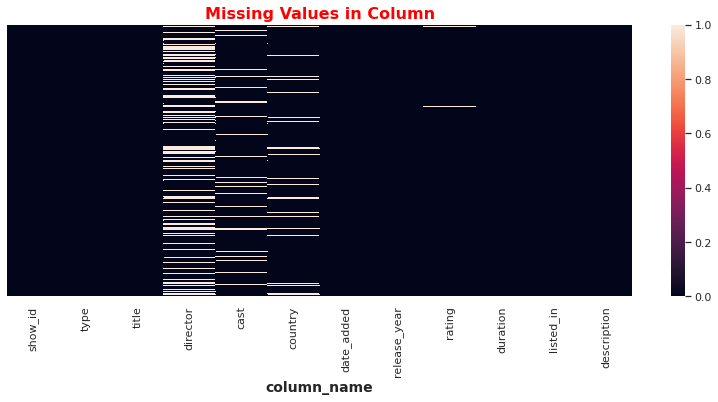

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=16,color='red')
plt.show()



### What did you know about your dataset?

NaN values present in the director, cast, country, date_added and rating column. 

All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty space in below procedure analyzing each columns.  

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ***3. Variables Description***

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


- **After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.**
- **We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as well.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

### **4.1. type Column:**

Movie      5377
TV Show    2410
Name: type, dtype: int64
 


Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

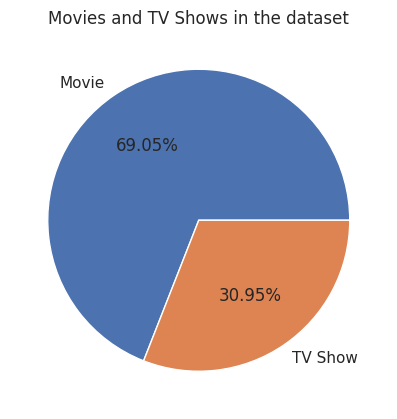

In [ ]:
# type Column Value Counts
print(df.type.value_counts())
print(" ")

# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(10,5),dpi=100)
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

**Analysis from above graph.**
1. **Greater number of count belong from movie class than Tv show class.**  
2. **There are more movies (69.05%) than TV shows (30.95%)  in the dataset.**

### **4.2 Title column:**

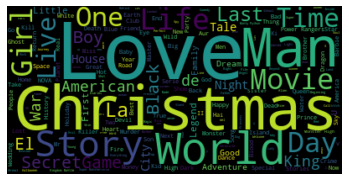

In [ ]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Analysis from above graph.**
1. **The words like Christmas, Love, World, Man and  Story are very comman word which are appear most in movie title column.**  

### **4.3 Director column:**

In [ ]:
print(f"number of director who  by directed movie : { df[df['type']=='Movie']['director'].value_counts().sum()}")
print(f"number of director who  by directed TV Show : { df[df['type']=='TV Show']['director'].value_counts().sum()}")

number of director who  by directed movie : 5214
number of director who  by directed TV Show : 184


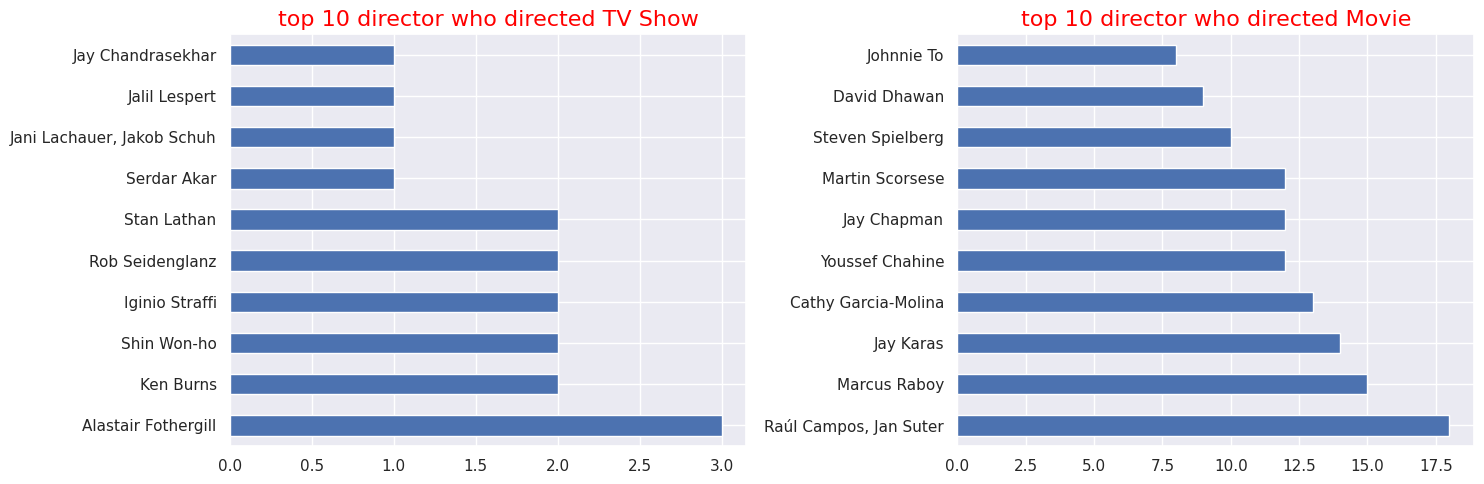

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=16,color='red')

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=16,color='red')

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. Alastair Fothergill has directed three TV shows, the most of any director.
2. Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.
3. This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina


### **4.4 Cast column:**

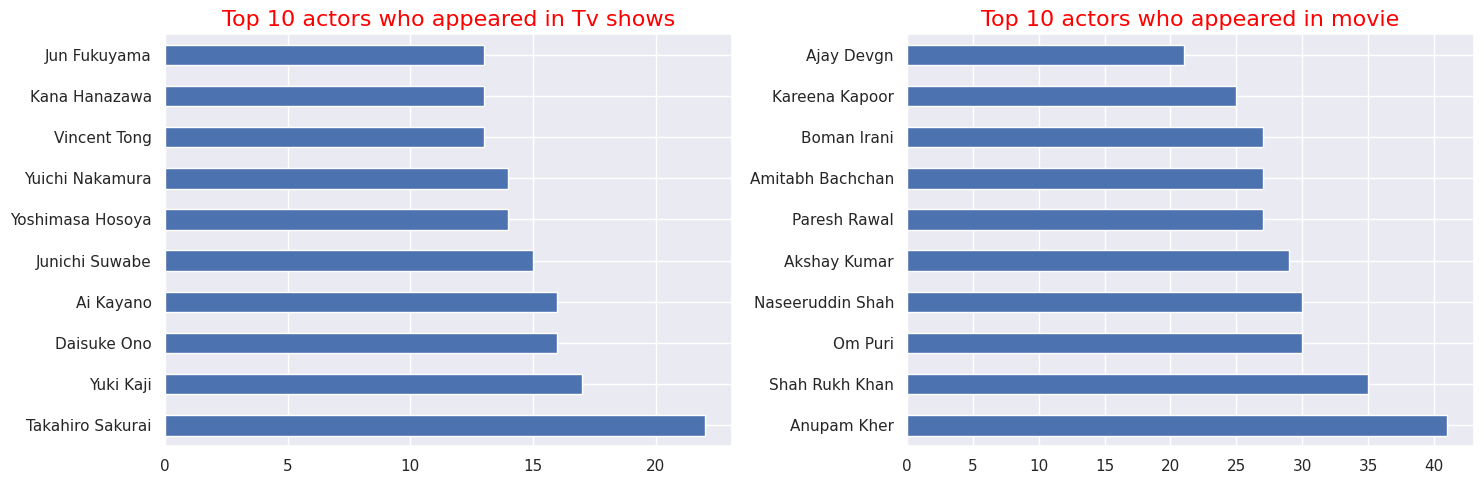

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 TV shows actor 
TV_shows = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=16,color='red')

# top 10 Movie actor 
movies = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=16,color='red')

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.**
2. **Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.**